In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

standard = pd.read_csv("results/log_0_ResNet18_standard_1.0.csv")
weighted_05 = pd.read_csv("results/log_0_ResNet18_weighted_0.5.csv")
weighted_025 = pd.read_csv("results/log_0_ResNet18_weighted_0.25.csv")
weighted_0125 = pd.read_csv("results/log_0_ResNet18_weighted_0.125.csv")
weighted_1 = pd.read_csv("results/log_0_ResNet18_weighted_1.csv")
weighted_2 = pd.read_csv("results/log_0_ResNet18_weighted_2.csv")
weighted_4 = pd.read_csv("results/log_0_ResNet18_weighted_4.csv")
weighted_8 = pd.read_csv("results/log_0_ResNet18_weighted_8.csv")
standard_alpha01 = pd.read_csv("results/log_alpha01_ResNet18_standard_1.0.csv")
standard_alpha02 = pd.read_csv("results/log_alpha02_ResNet18_standard_1.0.csv")
erm_neg2 = pd.read_csv("results/log_decay1e-2_ResNet18_erm_1.0.csv")
erm_neg3 = pd.read_csv("results/log_decay1e-3_ResNet18_erm_1.0.csv")
erm_neg4 = pd.read_csv("results/log_decay1e-4_ResNet18_erm_1.0.csv")
mu0_05 = pd.read_csv("results/log_mu0_ResNet18_weighted_0.5.csv")
mu0_025 = pd.read_csv("results/log_mu0_ResNet18_weighted_0.25.csv")
mu0_0125 = pd.read_csv("results/log_mu0_ResNet18_weighted_0.125.csv")
mu0_1 = pd.read_csv("results/log_mu0_ResNet18_weighted_1.csv")
mu05_alpha01 = pd.read_csv("results/log_mu05_alpha01_ResNet18_weighted_1.csv")
mu05_alpha02 = pd.read_csv("results/log_mu05_alpha02_ResNet18_weighted_1.csv")
mu05_05 = pd.read_csv("results/log_mu05_ResNet18_weighted_0.5.csv")
mu05_025 = pd.read_csv("results/log_mu05_ResNet18_weighted_0.25.csv")
mu_05_125 = pd.read_csv("results/log_mu05_ResNet18_weighted_0.125.csv")
mu05_1 = pd.read_csv("results/log_mu05_ResNet18_weighted_1.csv")

standard["experiment"] = "standard"
weighted_05["experiment"] = "weighted 0.5"
weighted_025["experiment"] = "weighted 0.25"
weighted_0125["experiment"] = "weighted 0.125"
weighted_1["experiment"] = "weighted 1"
weighted_2["experiment"] = "weighted 2"
weighted_4["experiment"] = "weighted 4"
weighted_8["experiment"] = "weighted 8"
standard_alpha01["experiment"] = "standard alpha 0.1"
standard_alpha02["experiment"] = "standard alpha 0.2"
erm_neg2["experiment"] = "erm decay 1e-2"
erm_neg3["experiment"] = "erm decay 1e-3"
erm_neg4["experiment"] = "erm decay 1e-4"
mu0_05["experiment"] = "mu 0 weighted 0.5"
mu0_025["experiment"] = "mu 0 weighted 0.25"
mu0_0125["experiment"] = "mu 0 weighted 0.125"
mu0_1["experiment"] = "mu 0 weighted 1"
mu05_alpha01["experiment"] = "mu 0.5 alpha 0.1"
mu05_alpha02["experiment"] = "mu 0.5 alpha 0.2"
mu05_05["experiment"] = "mu 0.5 weighted 0.5"
mu05_025["experiment"] = "mu 0.5 weighted 0.25"
mu_05_125["experiment"] = "mu 0.5 weighted 0.125"
mu05_1["experiment"] = "mu 0.5 weighted 1"

df = pd.concat(
    [
        standard,
        weighted_05,
        weighted_025,
        weighted_0125,
        weighted_1,
        weighted_2,
        weighted_4,
        weighted_8,
        standard_alpha01,
        standard_alpha02,
        erm_neg2,
        erm_neg3,
        erm_neg4,
        mu0_05,
        mu0_025,
        mu0_0125,
        mu0_1,
        mu05_alpha01,
        mu05_alpha02,
        mu05_05,
        mu05_025,
        mu_05_125,
        mu05_1,
    ]
)
df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [3]:
print("Best test accuracy")
print(df.groupby("experiment")["test acc"].max().sort_values(ascending=False))

Best test accuracy
experiment
mu 0.5 weighted 0.25     0.9471
mu 0 weighted 0.25       0.9457
mu 0 weighted 0.125      0.9446
weighted 0.125           0.9441
mu 0 weighted 0.5        0.9441
mu 0 weighted 1          0.9440
mu 0.5 weighted 0.125    0.9436
mu 0.5 weighted 1        0.9432
weighted 1               0.9429
weighted 0.5             0.9428
standard                 0.9417
mu 0.5 weighted 0.5      0.9417
weighted 0.25            0.9411
standard alpha 0.2       0.9410
weighted 2               0.9397
mu 0.5 alpha 0.1         0.9391
mu 0.5 alpha 0.2         0.9389
standard alpha 0.1       0.9374
weighted 4               0.9327
weighted 8               0.9168
erm decay 1e-4           0.4885
erm decay 1e-3           0.4790
erm decay 1e-2           0.2878
Name: test acc, dtype: float64


In [4]:
print("Best median test accuracy in last 10 epochs")
last_10 = df.groupby("experiment")["test acc"].apply(lambda x: x.tail(10))
medians = last_10.groupby("experiment").median()
medians.sort_values(ascending=False)

Best median test accuracy in last 10 epochs


experiment
mu 0.5 weighted 0.25     0.94065
standard alpha 0.2       0.93960
weighted 1               0.93920
mu 0.5 weighted 1        0.93850
mu 0.5 weighted 0.125    0.93830
mu 0.5 alpha 0.2         0.93795
mu 0.5 alpha 0.1         0.93755
standard alpha 0.1       0.93635
standard                 0.93470
mu 0 weighted 0.5        0.93450
weighted 0.5             0.93425
mu 0.5 weighted 0.5      0.93420
weighted 0.125           0.93370
weighted 2               0.93295
mu 0 weighted 0.25       0.93105
mu 0 weighted 1          0.92975
mu 0 weighted 0.125      0.92920
weighted 0.25            0.92485
weighted 4               0.92325
weighted 8               0.89540
erm decay 1e-4           0.48740
erm decay 1e-3           0.47835
erm decay 1e-2           0.10000
Name: test acc, dtype: float64

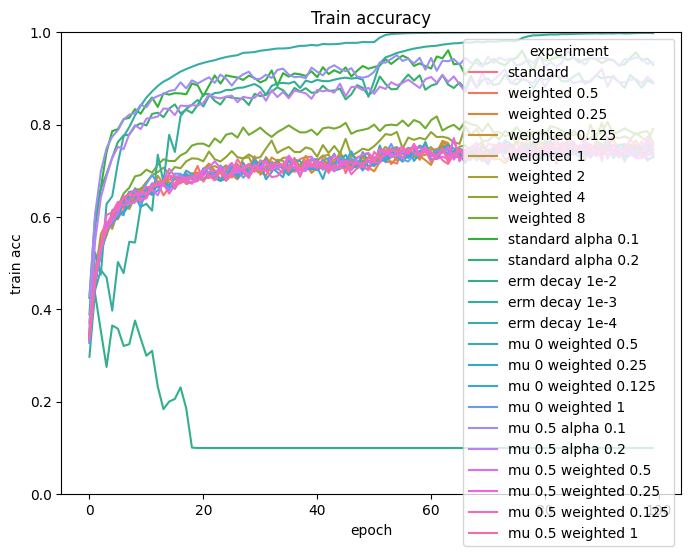

In [5]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

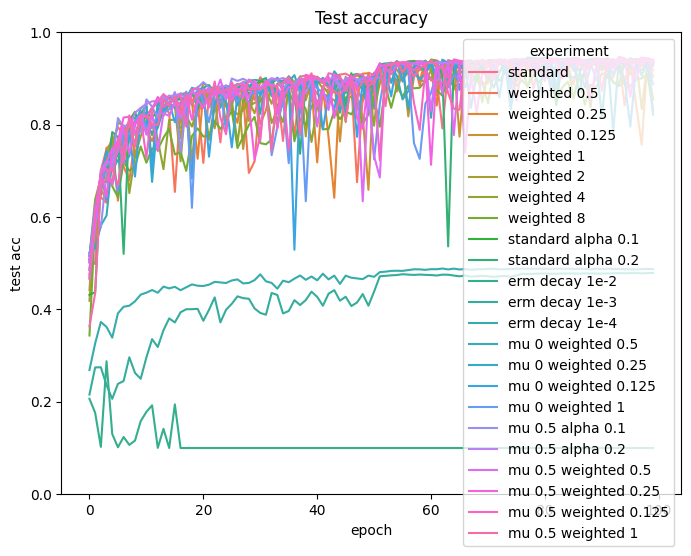

In [6]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

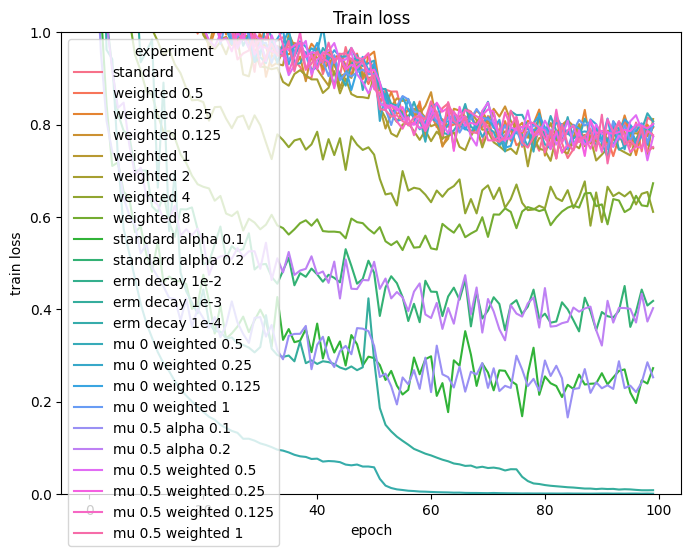

In [7]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

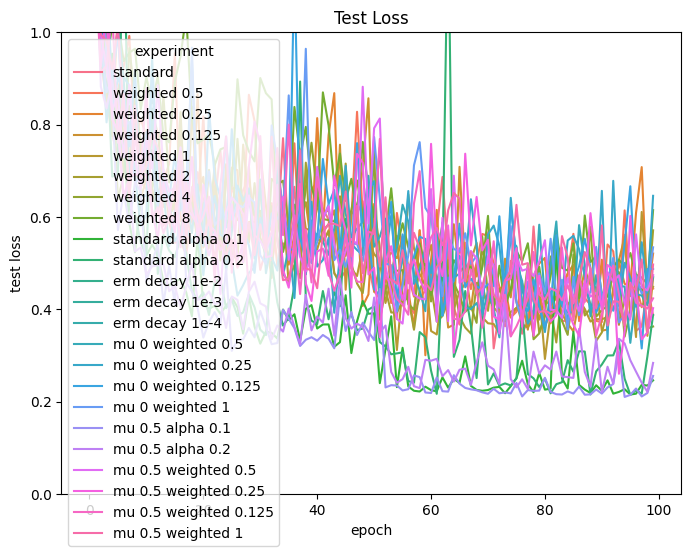

In [8]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

In [9]:
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix

In [10]:
cms_dict = {
    "cm_weighted_0.5": torch.load("results/cm_0_ResNet18_weighted_0.5.pt"),
    "cm_weighted_0.25": torch.load("results/cm_0_ResNet18_weighted_0.25.pt"),
    "cm_weighted_0.125": torch.load("results/cm_0_ResNet18_weighted_0.125.pt"),
    "cm_weighted_1": torch.load("results/cm_0_ResNet18_weighted_1.pt"),
    "cm_weighted_2": torch.load("results/cm_0_ResNet18_weighted_2.pt"),
    "cm_weighted_4": torch.load("results/cm_0_ResNet18_weighted_4.pt"),
    "cm_weighted_8": torch.load("results/cm_0_ResNet18_weighted_8.pt"),
    "cm_mu0_0.5": torch.load("results/cm_0_ResNet18_weighted_0.5.pt"),
    "cm_mu0_0.25": torch.load("results/cm_0_ResNet18_weighted_0.25.pt"),
    "cm_mu0_0.125": torch.load("results/cm_0_ResNet18_weighted_0.125.pt"),
    "cm_mu0_1": torch.load("results/cm_0_ResNet18_weighted_1.pt"),
    "cm_mu05_0.5": torch.load("results/cm_0_ResNet18_weighted_0.5.pt"),
    "cm_mu05_0.25": torch.load("results/cm_0_ResNet18_weighted_0.25.pt"),
    "cm_mu_05_0.125": torch.load("results/cm_0_ResNet18_weighted_0.125.pt"),
    "cm_mu05_1": torch.load("results/cm_0_ResNet18_weighted_1.pt"),
}

cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df[f"std_pre"] = std_pre

    gamma = key.split("_")[-1]
    post = cms ** float(gamma)
    for i in range(100):
        post[i] = make_doubly_stochastic(post[i])
    std_post = np.std(post.reshape(100, -1), axis=1)
    cur_df[f"std_post"] = std_post

    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

cms_df = pd.concat(cms_df)

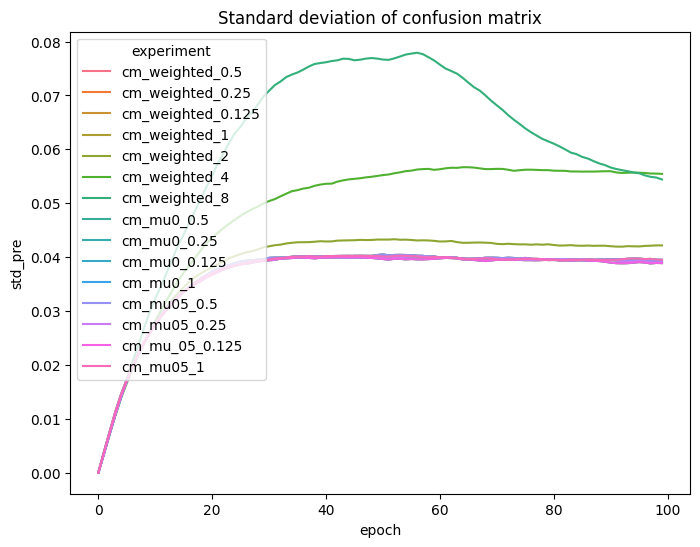

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=cms_df, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix")
plt.show()

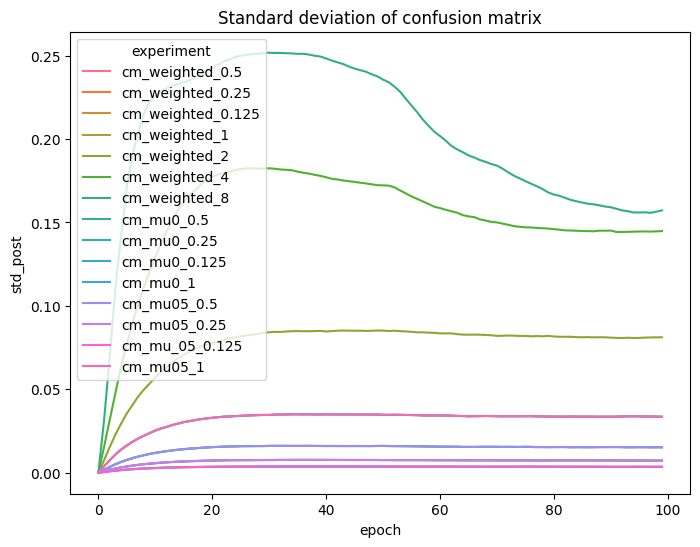

In [12]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=cms_df, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix")
plt.show()